## create_at: 2019/12/14

## Feature Goal : found upperbound and lowerbound of  DANN
 
> 
> **Definition**
> 
> Upperbound : train with target data and predict target (no domain adaption)
>
> Experiment : train with source data and predict target (with domain adaption)
>
> Lowerbound : train with source data and predict target (no domain adaption)



### todo list

- [ ] Change source name form mnist to "source" 
- [ ] Train each source to each target.
- [ ] Add MAPE indicator
- [ ] refactor
- [ ] TSNE plot


In [40]:
"""
MNIST - MNIST-M Domain Adaptation
"""

import tensorflow as tf

print(tf.__version__)

import numpy as np

from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D, BatchNormalization, Dropout

import os
import shutil
import sys
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

2.0.0


In [41]:
phm_folder= "../datasets/phm-2012-wt/"


path_X_train_Bearing1_1 = phm_folder+'X_train_Bearing1_1.npy' 
path_X_train_Bearing1_2 = phm_folder+'X_train_Bearing1_2.npy'
path_X_train_Bearing2_1 = phm_folder+'X_train_Bearing2_1.npy' 
path_X_train_Bearing2_2 = phm_folder+'X_train_Bearing2_2.npy' 
path_X_train_Bearing3_1 = phm_folder+'X_train_Bearing3_1.npy' 
path_X_train_Bearing3_2 = phm_folder+'X_train_Bearing3_2.npy' 


path_Y_train_Bearing1_1 = phm_folder+'Y_train_Bearing1_1.npy' 
path_Y_train_Bearing1_2 = phm_folder+'Y_train_Bearing1_2.npy'
path_Y_train_Bearing2_1 = phm_folder+'Y_train_Bearing2_1.npy' 
path_Y_train_Bearing2_2 = phm_folder+'Y_train_Bearing2_2.npy' 
path_Y_train_Bearing3_1 = phm_folder+'Y_train_Bearing3_1.npy' 
path_Y_train_Bearing3_2 = phm_folder+'Y_train_Bearing3_2.npy' 

In [42]:
X_train_Bearing1_1 = np.load(path_X_train_Bearing1_1)
X_train_Bearing1_2 = np.load(path_X_train_Bearing1_2)
X_train_Bearing2_1 = np.load(path_X_train_Bearing2_1)
X_train_Bearing2_2 = np.load(path_X_train_Bearing2_2)
X_train_Bearing3_1 = np.load(path_X_train_Bearing3_1)
X_train_Bearing3_2 = np.load(path_X_train_Bearing3_2)

Y_train_Bearing1_1 = np.load(path_Y_train_Bearing1_1)
Y_train_Bearing1_2 = np.load(path_Y_train_Bearing1_2)
Y_train_Bearing2_1 = np.load(path_Y_train_Bearing2_1)
Y_train_Bearing2_2 = np.load(path_Y_train_Bearing2_2)
Y_train_Bearing3_1 = np.load(path_Y_train_Bearing3_1)
Y_train_Bearing3_2 = np.load(path_Y_train_Bearing3_2)

In [43]:
def move_channel(array_to_move, channel_from, channel_to):
    
    data = np.moveaxis(array_to_move, channel_from, channel_to)
    return data
def show_data_shape():
    """ show phm bearing data shape.
    """
    
    print( "X_train_Bearing1_1.shape", X_train_Bearing1_1.shape)
    print( "X_train_Bearing1_2.shape", X_train_Bearing1_2.shape)
    print( "X_train_Bearing2_1.shape",X_train_Bearing2_1.shape)
    print( "X_train_Bearing2_2.shape",X_train_Bearing2_2.shape)
    print( "X_train_Bearing3_1.shape",X_train_Bearing3_1.shape)
    print( "X_train_Bearing3_2.shape",X_train_Bearing3_2.shape)
    
    print( "Y_train_Bearing1_1.shape", Y_train_Bearing1_1.shape )
    print( "Y_train_Bearing1_2.shape", Y_train_Bearing1_2.shape )
    print( "Y_train_Bearing2_1.shape", Y_train_Bearing2_1.shape )
    print( "Y_train_Bearing2_2.shape", Y_train_Bearing2_2.shape )
    print( "Y_train_Bearing3_1.shape", Y_train_Bearing3_1.shape )
    print( "Y_train_Bearing3_2.shape", Y_train_Bearing3_2.shape )
    
def show_phm_image(phm_img ,mode="last"):
    """ show image according to channel mode
    
    Args:
        phm_img (numpy array): phm image array.
        mode (str): channel mode, only accept 'first'(channel_first) or 'last'(channel_last) 

    Returns:
        None
    """
    if mode == "first":
        plt.imshow(phm_img[0,:,:])
    else:
        plt.imshow(phm_img[:,:,0])

## channel first to channel last

In [44]:
print("## Before")
show_data_shape()

X_train_Bearing1_1 = move_channel(X_train_Bearing1_1, 1, 3)
X_train_Bearing1_2 = move_channel(X_train_Bearing1_2, 1, 3)
X_train_Bearing2_1 = move_channel(X_train_Bearing2_1, 1, 3)
X_train_Bearing2_2 = move_channel(X_train_Bearing2_2, 1, 3)
X_train_Bearing3_1 = move_channel(X_train_Bearing3_1, 1, 3)
X_train_Bearing3_2 = move_channel(X_train_Bearing3_2, 1, 3)
print("## After")
show_data_shape()

## Before
X_train_Bearing1_1.shape (2803, 1, 511, 99)
X_train_Bearing1_2.shape (871, 1, 511, 99)
X_train_Bearing2_1.shape (911, 1, 511, 99)
X_train_Bearing2_2.shape (797, 1, 511, 99)
X_train_Bearing3_1.shape (515, 1, 511, 99)
X_train_Bearing3_2.shape (1637, 1, 511, 99)
Y_train_Bearing1_1.shape (2803,)
Y_train_Bearing1_2.shape (871,)
Y_train_Bearing2_1.shape (911,)
Y_train_Bearing2_2.shape (797,)
Y_train_Bearing3_1.shape (515,)
Y_train_Bearing3_2.shape (1637,)
## After
X_train_Bearing1_1.shape (2803, 511, 99, 1)
X_train_Bearing1_2.shape (871, 511, 99, 1)
X_train_Bearing2_1.shape (911, 511, 99, 1)
X_train_Bearing2_2.shape (797, 511, 99, 1)
X_train_Bearing3_1.shape (515, 511, 99, 1)
X_train_Bearing3_2.shape (1637, 511, 99, 1)
Y_train_Bearing1_1.shape (2803,)
Y_train_Bearing1_2.shape (871,)
Y_train_Bearing2_1.shape (911,)
Y_train_Bearing2_2.shape (797,)
Y_train_Bearing3_1.shape (515,)
Y_train_Bearing3_2.shape (1637,)


In [45]:
bearing_dataset = dict()
bearing_dataset['bearing1_1'] = {'data': X_train_Bearing1_1, 'label':Y_train_Bearing1_1}
bearing_dataset['bearing1_2'] = {'data': X_train_Bearing1_2, 'label':Y_train_Bearing1_2}
bearing_dataset['bearing2_1'] = {'data': X_train_Bearing2_1, 'label':Y_train_Bearing2_1}
bearing_dataset['bearing2_2'] = {'data': X_train_Bearing2_2, 'label':Y_train_Bearing2_2}
bearing_dataset['bearing3_1'] = {'data': X_train_Bearing3_1, 'label':Y_train_Bearing3_1}
bearing_dataset['bearing3_2'] = {'data': X_train_Bearing3_2, 'label':Y_train_Bearing3_2}

In [46]:
#CONSTANTS
# MNIST_M_PATH = './Datasets/MNIST_M/mnistm.h5'

BEARING_SOURCE_DATA_NUM = 500
BEARING_TARGET_DATA_NUM = 500

BATCH_SIZE = 4
# CHANNELS = 3
EPOCH = 20


SOURCE_DATA_NAME = 'Bearing1_1'
TARGET_DATA_NAME = 'Bearing1_2'

## dataset func

In [47]:
def increase_data(data_x, data_y, truncate_num=3000):
    """ make data to certain number
    
    Args:
        data_x (numpy array): phm image array. shape = (image_num, height, width, channel)
        data_y (numpy array): phm image label array. shape (image_num,)  
        truncate_num (int): truncate the image total number of image. 
        
    Returns:
        increased_data_x:  phm image array. shape = (truncate_num, height, width, channel)
        increased_data_y:  phm image label array. shape = (truncate_num,)
    
    """
    
    
    repeats_num = int( truncate_num/data_x.shape[0] ) + 1
    
    _inceresed_data_x = np.repeat(data_x, repeats=repeats_num, axis= 0)
    _inceresed_data_y = np.repeat(data_y, repeats=repeats_num, axis= 0)
    
    return _inceresed_data_x[:truncate_num,:,:], _inceresed_data_y[:truncate_num]
    

In [48]:
def load_dataset(dataset_name='bearing1_1'):
    """ load bearing dataset by name
    
    Args:
        dataset_name (str): Bearing dataset name

    Returns:
        numpy array : Bearing image data.
        numpy array : Bearing image label according to image.
    
    
    """
    print("[load_dataset] user want to load {} data".format(dataset_name) )
    dataset_name = dataset_name.lower()
    try:
        return bearing_dataset[dataset_name]['data'], bearing_dataset[dataset_name]['label']
    except KeyError as e:
        print("key not found in bearing_dataset")
        
    
    
    

## Load PHM Data (Source)

In [49]:
mnist_source_x, mnist_source_y = load_dataset(SOURCE_DATA_NAME)

mnist_source_x, mnist_source_y = increase_data(mnist_source_x, mnist_source_y, 5000)


mnist_train_x = mnist_source_x[:BEARING_SOURCE_DATA_NUM,:,:]
mnist_test_x  = mnist_source_x[BEARING_SOURCE_DATA_NUM:(BEARING_SOURCE_DATA_NUM*2),:,:]

mnist_train_x, mnist_test_x = mnist_train_x.astype('float32'), mnist_test_x.astype('float32')

# mnist_train_x, mnist_test_x = X_train_Bearing1_1, X_train_Bearing1_2
# mnist_train_x = mnist_train_x[:BEARING_SOURCE_DATA_NUM,:,:]
# mnist_test_x  = mnist_test_x[:BEARING_SOURCE_DATA_NUM,:,:]

mnist_train_y = mnist_source_y[:BEARING_SOURCE_DATA_NUM]
mnist_test_y  = mnist_source_y[BEARING_SOURCE_DATA_NUM:(BEARING_SOURCE_DATA_NUM*2)]

# mnist_train_y = tf.one_hot(mnist_train_y, depth=10)
# mnist_test_y = tf.one_hot(mnist_test_y, depth=10)

[load_dataset] user want to load Bearing1_1 data


In [50]:
print( mnist_train_x.shape)
print(mnist_test_x.shape)
print(mnist_train_y.shape)
print(mnist_test_y.shape)

(500, 511, 99, 1)
(500, 511, 99, 1)
(500,)
(500,)


## Load PHM Data(target)

In [51]:
mnist_m_target_x, mnist_m_target_y = load_dataset(TARGET_DATA_NAME)

mnist_m_target_x, mnist_m_target_y = increase_data(mnist_m_target_x, mnist_m_target_y, 5000)

mnist_m_train_x = mnist_m_target_x[:BEARING_TARGET_DATA_NUM,:,:]
mnist_m_test_x  = mnist_m_target_x[BEARING_TARGET_DATA_NUM:(BEARING_TARGET_DATA_NUM*2),:,:]

mnist_m_train_y = mnist_m_target_y[:BEARING_TARGET_DATA_NUM]
mnist_m_test_y  = mnist_m_target_y[BEARING_TARGET_DATA_NUM:(BEARING_TARGET_DATA_NUM*2)]


# mnist_m_train_x, mnist_m_test_x = X_train_Bearing2_1, X_train_Bearing2_2
# mnist_m_train_x, mnist_m_test_x = mnist_m_train_x.astype('float32'), mnist_m_test_x.astype('float32')

# mnist_m_train_x = mnist_m_train_x[:BEARING_SOURCE_DATA_NUM,:,:]
# mnist_m_test_x  = mnist_m_test_x[:BEARING_SOURCE_DATA_NUM,:,:]

# mnist_m_train_y = Y_train_Bearing2_1[:BEARING_SOURCE_DATA_NUM]
# mnist_m_test_y  = Y_train_Bearing2_2[:BEARING_SOURCE_DATA_NUM]



[load_dataset] user want to load Bearing1_2 data


In [52]:
print(mnist_m_train_x.shape)
print(mnist_m_test_x.shape)
print(mnist_m_train_y.shape)
print(mnist_m_test_y.shape)

(500, 511, 99, 1)
(500, 511, 99, 1)
(500,)
(500,)


# TSNE Plot

## Prepare Datasets

In [53]:
#Prepare Datasets

source_train_dataset = tf.data.Dataset.from_tensor_slices((mnist_train_x, mnist_train_y)).shuffle(1000).batch(BATCH_SIZE*2)
source_test_dataset = tf.data.Dataset.from_tensor_slices((mnist_test_x, mnist_test_y)).shuffle(1000).batch(BATCH_SIZE*2)

da_dataset = tf.data.Dataset.from_tensor_slices((mnist_train_x, mnist_train_y, mnist_m_train_x, mnist_m_train_y)).shuffle(1000).batch(BATCH_SIZE)

target_train_dataset = tf.data.Dataset.from_tensor_slices((mnist_m_train_x, mnist_m_train_y)).shuffle(1000).batch(BATCH_SIZE*2) #Test Dataset over Target (used for training)
target_test_dataset = tf.data.Dataset.from_tensor_slices((mnist_m_test_x, mnist_m_test_y)).shuffle(1000).batch(BATCH_SIZE*2) #Test Dataset over Target Domain


# test_dataset = tf.data.Dataset.from_tensor_slices((mnist_m_test_x, mnist_m_test_y)).shuffle(1000).batch(BATCH_SIZE*2) #Test Dataset over Target Domain

# test_dataset2 = tf.data.Dataset.from_tensor_slices((mnist_m_train_x, mnist_m_train_y)).shuffle(1000).batch(BATCH_SIZE*2) #Test Dataset over Target (used for training)





In [54]:
#Gradient Reversal Layer
@tf.custom_gradient
def gradient_reverse(x, lamda=1.0):
    y = tf.identity(x)
    
    def grad(dy):
        return lamda * -dy, None
    
    return y, grad

In [55]:
class GradientReversalLayer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
    
    def call(self, x, lamda=1.0):
        return gradient_reverse(x, lamda)

In [56]:
class DANN(Model):
    def __init__(self):
        super().__init__()
        # feature 
        self.feature_extractor_layer0 = Conv2D(32, kernel_size=(3, 3), activation='relu')
        self.feature_extractor_layer1 = BatchNormalization()
        self.feature_extractor_layer2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))
        self.feature_extractor_layer3 = Conv2D(64, kernel_size=(5, 5), activation='relu')
        self.feature_extractor_layer4 = Dropout(0.5)
        self.feature_extractor_layer5 = BatchNormalization()
        self.feature_extractor_layer6 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))
        # label
        self.label_predictor_layer0 = Dense(100, activation='relu')
        self.label_predictor_layer1 = Dense(100, activation='relu')
        self.label_predictor_layer2 = Dense(1, activation='sigmoid')
        # domain
        self.domain_predictor_layer0 = GradientReversalLayer()
        self.domain_predictor_layer1 = Dense(100, activation='relu')
        self.domain_predictor_layer2 = Dense(2, activation=None)
    def call(self, x, train=False, source_train=True, lamda=1.0):

        x = self.feature_extractor_layer0(x)
        x = self.feature_extractor_layer1(x, training=train)
        x = self.feature_extractor_layer2(x)
        
        x = self.feature_extractor_layer3(x)
        x = self.feature_extractor_layer4(x, training=train)
        x = self.feature_extractor_layer5(x, training=train)
        x = self.feature_extractor_layer6(x)
        
        # feature = tf.reshape(x, [-1, 64])
        feature = tf.keras.layers.Flatten()(x)
        if source_train is True:
            feature_slice = feature
        else:
            feature_slice = tf.slice(feature, [0, 0], [feature.shape[0] // 2, -1])
        
        lp_x = self.label_predictor_layer0(feature_slice)
        # print("[DANN call] lp_x :", tf.shape(lp_x))
        lp_x = self.label_predictor_layer1(lp_x)
        # print("[DANN call] lp_x :", tf.shape(lp_x))
        l_logits = self.label_predictor_layer2(lp_x)
        # print("[DANN call] l_logits :", tf.shape(l_logits))
        if source_train is True:
            return l_logits
        else:
            dp_x = self.domain_predictor_layer0(feature, lamda)    #GradientReversalLayer
            dp_x = self.domain_predictor_layer1(dp_x)
            d_logits = self.domain_predictor_layer2(dp_x)
            
            return l_logits, d_logits
        
    

In [57]:
model = DANN()
# source_model = DANN()
# target_model = DANN()

In [58]:
def loss_rmse(predictions, labels):
#     print("lose_rmse")
#     print(tf.shape(predictions))
#     print(tf.shape(labels))
#     return tf.sqrt(tf.reduce_mean((predictions - labels)**2))
    return tf.reduce_mean((predictions - labels)**2)

def loss_softmax_cross_entropy(input_logits, target_labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=input_logits, labels=target_labels))


def get_loss(l_logits, labels, d_logits=None, domain=None):
    if d_logits is None:
        return loss_rmse(l_logits, labels)
    else:
        return loss_rmse(l_logits, labels) + loss_softmax_cross_entropy(d_logits, domain)

## Global metrics 

In [59]:
model_optimizer = tf.optimizers.SGD()



domain_labels = np.vstack([np.tile([1., 0.], [BATCH_SIZE, 1]),
                           np.tile([0., 1.], [BATCH_SIZE, 1])])
domain_labels = domain_labels.astype('float32')






epoch_accuracy = tf.keras.metrics.CategoricalAccuracy()
epoch_rmse = tf.keras.metrics.RootMeanSquaredError()


source_acc = []  # Source Domain Accuracy while Source-only Training
source_rmse = []
da_acc = []  # Source Domain Accuracy while DA-training
da_rmse = []

target_acc = []
target_rmse = []

taregt_test_acc = []    # Testing Dataset (Target Domain) Accuracy 
taregt_test_rmse = []
# test_acc
# test_rmse
target_train_acc = []
target_train_rmse = []
# test2_acc = []   # Target Domain (used for Training) Accuracy
# test2_rmse = []

In [60]:
@tf.function
def train_step_source(s_images, s_labels, lamda=1.0):
    images = s_images
    labels = s_labels
    
    with tf.GradientTape() as tape:
        output = model(images, train=True, source_train=True, lamda=lamda)
        
        model_loss = get_loss(output, labels)
        epoch_rmse (output, labels)
        epoch_accuracy(output, labels)
        
    gradients_mdan = tape.gradient(model_loss, model.trainable_variables)
    model_optimizer.apply_gradients(zip(gradients_mdan, model.trainable_variables))

In [61]:
@tf.function
def train_step_da(s_images, s_labels, t_images=None, t_labels=None, lamda=1.0):
    images = tf.concat([s_images, t_images], 0)
    labels = s_labels
    
    with tf.GradientTape() as tape:
        output = model(images, train=True, source_train=False, lamda=lamda)
        
        model_loss = get_loss(output[0], labels, output[1], domain_labels)
        epoch_rmse (output[0], labels)
#         epoch_accuracy(output[0], labels)
        epoch_accuracy(output[1], domain_labels)
        
    gradients_mdan = tape.gradient(model_loss, model.trainable_variables)
    model_optimizer.apply_gradients(zip(gradients_mdan, model.trainable_variables))


In [62]:
@tf.function
def test_step(t_images, t_labels):
    images = t_images
    labels = t_labels
    
    output = model(images, train=False, source_train=True)
    epoch_rmse (output, labels)
#     epoch_accuracy(output, labels)


In [63]:
def train(train_mode, epochs=EPOCH):
    
    if train_mode == 'source':
        dataset = source_train_dataset
        train_func = train_step_source
        acc_list = source_acc
        rmse_list = source_rmse
        
        
    elif train_mode == 'target':
        dataset = target_train_dataset
        train_func = train_step_source
        acc_list = target_acc
        rmse_list = target_rmse
        
        
    elif train_mode == 'domain-adaptation':
        dataset = da_dataset
        train_func = train_step_da
        acc_list = da_acc
        rmse_list = da_rmse
    else:
        raise ValueError("Unknown training Mode")
    
    for epoch in range(epochs):
        p = float(epoch) / epochs
        lamda = 2 / (1 + np.exp(-100 * p, dtype=np.float32)) - 1
        lamda = lamda.astype('float32')

        for batch in dataset:
            train_func(*batch, lamda=lamda)
        
#         print("Training: Epoch {} :\t Source Accuracy : {:.3%}".format(epoch, epoch_accuracy.result()), end='  |  ')
        print("Training: Epoch {} :\t Source RMSE : {:.3},  Accuracy: {:.3%}".format(epoch, epoch_rmse.result(), epoch_accuracy.result()))
        acc_list.append(epoch_accuracy.result())
        rmse_list.append(epoch_rmse.result())
        test()
        epoch_accuracy.reset_states()
        epoch_rmse.reset_states()


In [64]:
def test():
    epoch_accuracy.reset_states()
    
#     Testing Dataset (Target Domain)
    for batch in target_test_dataset:
        test_step(*batch)
        
#     print("Testing Accuracy : {:.3%}".format(epoch_accuracy.result()), end='  |  ')
    print("Testing RMASE: {:.3}".format(epoch_rmse.result()))
#     taregt_test_acc.append(epoch_accuracy.result())
    taregt_test_rmse.append(epoch_rmse.result())
#     epoch_accuracy.reset_states()
    epoch_rmse.reset_states()
#     Target Domain (used for Training)
    for batch in target_train_dataset:
        test_step(*batch)
    
    print("Target domain RMASE: {:.3}".format(epoch_rmse.result()))
    target_train_rmse.append(epoch_rmse.result())
    epoch_accuracy.reset_states()
    epoch_rmse.reset_states()

In [65]:
# Training
# train('source', 5)

train('source',EPOCH)


Training: Epoch 0 :	 Source RMSE : 0.0759,  Accuracy: 34.921%
Testing RMASE: 0.266
Target domain RMASE: 0.462
Training: Epoch 1 :	 Source RMSE : 0.0514,  Accuracy: 25.397%
Testing RMASE: 0.291
Target domain RMASE: 0.501


KeyboardInterrupt: 

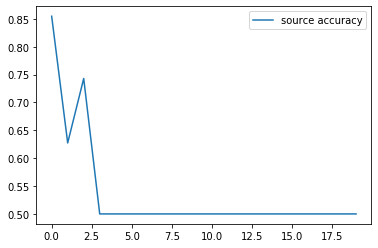

In [28]:
#Plot Results
x_axis = [i for i in range(0, EPOCH)]

plt.plot(x_axis, da_acc, label="source accuracy")
# plt.plot(x_axis, test_acc, label="testing accuracy")
# plt.plot(x_axis, test2_acc, label="target accuracy")
plt.legend()

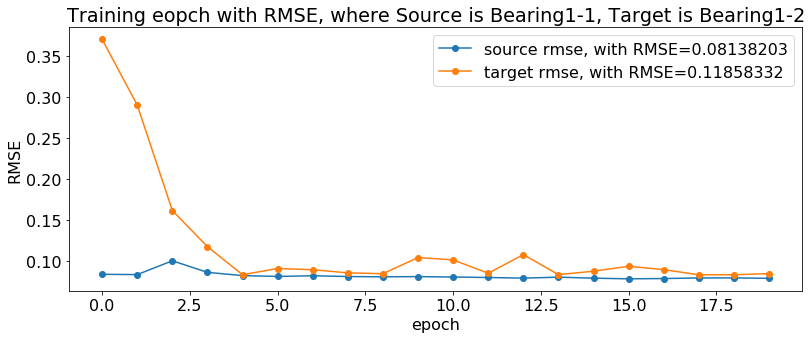

In [78]:
import pandas as pd

# plt.rcParams.update({'font.size': 16})

rmse_source = pd.DataFrame(da_rmse).mean()[0]
rmse_target = pd.DataFrame(test2_rmse).mean()[0]

#Plot Results
x_axis = [i for i in range(0, EPOCH)]

plt.figure(figsize=(12, 5))

label = "source rmse, with RMSE="+str(rmse_source)
plt.plot(x_axis, da_rmse, 'o-', label="source rmse, with RMSE="+str(rmse_source))
# plt.plot(x_axis, test_rmse, 'o-', label="testing rmse")
plt.plot(x_axis, test2_rmse, 'o-', label="target rmse, with RMSE="+str(rmse_target))
# plt.plot(x_axis, da_acc, label="source accuracy")
plt.title('Training eopch with RMSE, where Source is Bearing1-1, Target is Bearing1-2')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.tight_layout()
plt.savefig('dann.png', dpi=300)
plt.legend()

In [69]:

pd.DataFrame(da_rmse).mean()[0]

0.08138203